<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.11

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

A process tank has two input streams—Stream 1 at mass
ﬂow rate $w_1$ and Stream 2 at mass ﬂow rate $w_2$. The tank’s
efﬂuent stream, at ﬂow rate $w$, discharges through a fixed
valve to atmospheric pressure. Pressure drop across the valve
is proportional to the ﬂow rate squared. The cross-sectional
area of the tank, $A$, is 5 $m^2$, and the mass density of all streams is 940 kg/m3.

#### 2. Assumptions 

* Constant density 
* Constant temperature 

### 3. Process scheme 

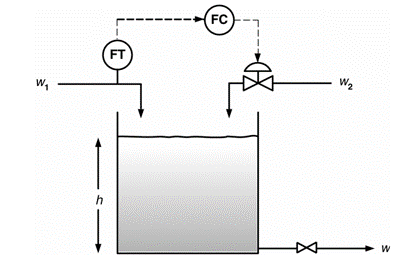

Figure 1. Process scheme 

### 4. Analysis 

#### Establish the model 

Mass balance 

$$
\frac{d(V \rho)}{dt} = w_1 + w_2 - w
$$


$$
\frac{d(A h \rho)}{dt} = w_1 + w_2 - C_v^* \sqrt{\Delta P}
$$


we know that
$$
\Delta P = P_a + P_m - P_a = P_m = \frac{\rho g h}{g_c}
$$

so 

$$
\rho A \frac{dh}{dt} = w_1 + w_2 - C_v \sqrt{h} \tag{1}
$$

where $C_v = C_v^* \sqrt{\rho g / g_c}$

#### Degrees of freedon analysis 

state variables: h (1)

equations: 1 DE (1)

degrees of freedom: 1 - 1 = 0

inputs: w1, w2

parameters: $\rho$, A, Cv

#### Steady state 

$$
w_1 + w_2 - C_v \sqrt{h} = 0 \hspace{1cm} \rightarrow \hspace{1cm} h_{sp} = \left(\frac{w_1 + w_2}{C_v} \right)^2
$$

At initial steady-state conditions, with $w_1$ = 2.0 kg/s and
$w_2$ = 1.2 kg/s, the tank level is 2.25 m. What is the value of the
valve constant (give units)?

$$
C_v = \frac{w_1 + w_2}{\sqrt{h_{sp}}} = \frac{3.2\ kg/s}{2.25\ m} = 2.133 \ kg/ms
$$

#### Numerical simulation 

In [7]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [40]:
# write the model 
def height(s,t,u,p):

    # state variables 
    h = s[0]

    # inputs
    w1 = u[0]
    w2 = u[1]

    # parameters
    rho = p[0]
    A = p[1]
    Cv = p[2]

    # mass flow at outlet
    w = Cv*np.sqrt(h)

    # mass balance
    dhdt = 1/(rho*A)*(w1 + w2 - w)

    return dhdt

In [64]:
# set parameters
rho = 940 # kg/m3
A = 5 # m2
Cv = 2.13 # kg/(m*s)
p = [rho, A, Cv]

In [65]:
# establish inputs 
w1 = 2 # kg/s
w2 = 1.2 # kg/s
u = [w1, w2]

In [73]:
# set initial conditions 
s = [1.2]

In [74]:
# establish integration time 
time = np.linspace(0,10000,100)

In [75]:
# solve ODEs
out = odeint(height, s, time, args=(u,p))

In [76]:
h = out[:,0]

Text(0, 0.5, 'height (m)')

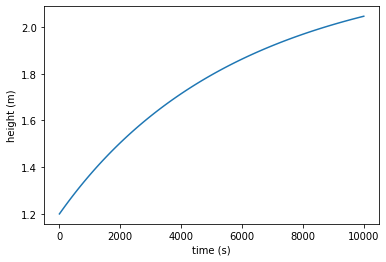

In [77]:
# show results 
plt.plot(time, h)
plt.xlabel("time (s)")
plt.ylabel("height (m)")

In [82]:
def steady_state(u,p):

    # inputs
    w1 = u[0]
    w2 = u[1]

    # parameter
    Cv = p[2]

    # steady state height
    h_sp = ((w1 + w2)/Cv)**2

    return h_sp

In [83]:
steady_state(u,p)

2.2570477638916446

What happen if we vary the inflow rate w1 10 % from its nominal value 

$$
w_1 = 2 \pm 0.2 = [1.8, 2.2]
$$

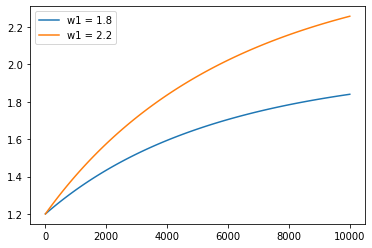

In [90]:
for w1 in [1.8, 2.2]:
    u[0] = w1
    # solve ODEs
    out = odeint(height, s, time, args=(u,p))
    h = out[:,0]
    plt.plot(time, h)
w1 = 2 # return w1 to its original value 
plt.legend(["w1 = 1.8", "w1 = 2.2"])

What happed if we vary w1 during the simulation 

In [120]:
# variable w1
w1 = np.ones(len(time))*2
w1[25:50] = 1
w1[50:75] = 3
w1[75:100] = 1

# constant w2
w2 = np.ones(len(time))*1.2

In [121]:
# vector to save height
h = np.ones(len(time))*2.25
s = [2.25]

In [122]:
# for cycle to change w1 during simulation 
for i in range(len(time)-1):

    # update span time
    ts = [time[i], time[i+1]]

    # update w1
    u[0] = w1[i+1]

    # solve ODE
    out = odeint(height, s, ts, args=(u,p))

    # save height
    h[i+1] = out[-1][0]

    # update initial condition 
    s = out[-1][0]

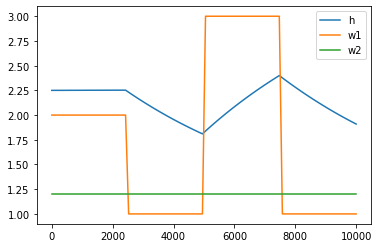

In [126]:
plt.plot(time,h, time, w1, time, w2)
plt.legend(["h","w1","w2"])

Let's to apply a control in order to reduce the effect of change w1 on h

In [128]:
s = [2.25] # set initial condition
# for cycle to change w1 during simulation 
for i in range(len(time)-1):

    # update span time
    ts = [time[i], time[i+1]]

    # update w1
    u[0] = w1[i+1]

    # apply control strategy
    w2[i+1] = 3.2 - w1[i+1] # from the steady state equation

    # update w2
    u[1] = w2[i+1] 

    # solve ODE
    out = odeint(height, s, ts, args=(u,p))

    # save height
    h[i+1] = out[-1][0]

    # update initial condition 
    s = out[-1][0]

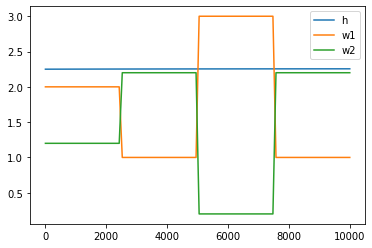

In [130]:
plt.plot(time,h, time, w1, time, w2)
plt.legend(["h","w1","w2"])

A feed forward control is able to avoid changes in the controlled variable when the disturbance variables are measured with adecuacy 